## Chemical Features of acetic acid

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rdkit import Chem, RDConfig
from rdkit.Chem import AllChem, ChemicalFeatures
from rdkit import RDLogger 
RDLogger.DisableLog('rdApp.*')

from openpharmacophore.ligand_based import LigandBasedPharmacophore
from openpharmacophore.utils.ligand_features import ligands_pharmacophoric_points
from openpharmacophore.utils.rdkit_to_point import rdkit_to_point
from openpharmacophore.utils.conformers import generate_conformers
from openpharmacophore.utils.load_custom_feats import load_smarts_fdef
from openpharmacophore import pharmacophoric_elements
from openpharmacophore.visualization.view_ligands import view_ligands

import os
import numpy as np
import pyunitwizard as puw
import nglview as nv

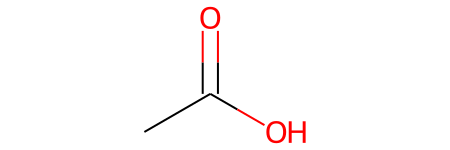

In [3]:
acetic_acid = Chem.MolFromSmiles("CC(=O)O")
acetic_acid

### Get Chemical features using rdkit's definition

In [4]:
acetic_acid = generate_conformers(acetic_acid, 1, random_seed=1, alignment=False)

# Get features for acetic acid
# RDKIT DEFINITION
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)
feats = factory.GetFeaturesForMol(acetic_acid)
feat_list = ['Acceptor', 'Aromatic', 'Donor', 'Hydrophobe', 'PosIonizable', 'NegIonizable']
for f in feats:
        feat_name = f.GetFamily()
        if feat_name not in feat_list:
            continue
        atom_idxs = f.GetAtomIds()
        print(f"{feat_name}, atoms: {atom_idxs}")

Donor, atoms: (3,)
Acceptor, atoms: (2,)
Acceptor, atoms: (3,)
NegIonizable, atoms: (1, 2, 3)
Hydrophobe, atoms: (0,)


In [5]:
# Get openpharmacophore points
# Spheres point type
points = ligands_pharmacophoric_points(acetic_acid, feat_list=None, feat_def=None, 
                               point_type="spheres_vectors", radius=0.5)
points = points["ligand_0"]["conformer_0"]
points

 NegativeChargeSphere(center: [0.08966065176585349 0.03784658233931392 -0.01482808230401158] nanometer; radius: 0.049999999999999996 nanometer),
 HydrophobicSphere(center: [-0.09784806639803127 -0.007748464893933106 0.002340867834109689] nanometer; radius: 0.049999999999999996 nanometer)]

In [6]:
pharmacophore = LigandBasedPharmacophore(elements=points, molecular_system=acetic_acid)
pharmacophore.show()

NGLWidget()

### Load a custom features definition and get acetic acid's chemical features

In [7]:
custom_feat_def = load_smarts_fdef("../data/feat_defs/smarts_features.txt")
# custom_feat_def

In [8]:
# Get features for acetic acid
# Custom DEFINITION
feat_list = ['Acceptor', 'Aromatic', 'Donor', 'Hydrophobe', 'PosIonizable', 'NegIonizable']
        
for feat, feat_name in custom_feat_def.items():
            if feat_name not in feat_list:
                continue
            pattern = Chem.MolFromSmarts(feat)  
            atom_idxs = acetic_acid.GetSubstructMatch(pattern)
            if len(atom_idxs) == 0:
                continue
            print(f"{feat_name}, atoms: {atom_idxs}")

Acceptor, atoms: (2,)
NegIonizable, atoms: (1, 2, 3)
Hydrophobe, atoms: (0,)


In [9]:
# Get openpharmacophore points
acetic_acid = generate_conformers(acetic_acid, 1, random_seed=1, alignment=False)
points = ligands_pharmacophoric_points(acetic_acid, feat_list=None, feat_def=custom_feat_def, 
                               point_type="spheres", radius=1)
points = points["ligand_0"]["conformer_0"]
points

[HBAcceptorSphere(center: [0.07903459193908467 0.1487388014682705 0.002355596284157232] nanometer; radius: 0.09999999999999999 nanometer),
 NegativeChargeSphere(center: [0.08966065176585349 0.03784658233931392 -0.01482808230401158] nanometer; radius: 0.09999999999999999 nanometer),
 HydrophobicSphere(center: [-0.09784806639803127 -0.007748464893933106 0.002340867834109689] nanometer; radius: 0.09999999999999999 nanometer)]

In [10]:
for point in points:
    print(f"Center = {point.center}")
    print(f"Radius = {point.radius}")

Center = [0.07903459193908467 0.1487388014682705 0.002355596284157232] nanometer
Radius = 0.09999999999999999 nanometer
Center = [0.08966065176585349 0.03784658233931392 -0.01482808230401158] nanometer
Radius = 0.09999999999999999 nanometer
Center = [-0.09784806639803127 -0.007748464893933106 0.002340867834109689] nanometer
Radius = 0.09999999999999999 nanometer


## Benzoic acid

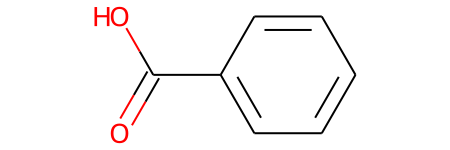

In [11]:
benzoic_acid = Chem.MolFromSmiles("C1=CC=C(C=C1)C(=O)O")
benzoic_acid

In [12]:
benzoic_acid = generate_conformers(benzoic_acid, 1, random_seed=1, alignment=False)

In [13]:
feat_list = ['Acceptor', 'Aromatic', 'Donor', 'PosIonizable', 'NegIonizable']

benzoic_points = ligands_pharmacophoric_points(benzoic_acid, feat_list=feat_list, feat_def=None, 
                               point_type="spheres_vectors", radius=1)
benzoic_points = benzoic_points["ligand_0"]["conformer_0"]

benzoic_pharmacophore = LigandBasedPharmacophore(elements=benzoic_points,
                                                molecular_system=benzoic_acid)

benzoic_pharmacophore.remove_element(2)
benzoic_pharmacophore.remove_feature("negative charge")
benzoic_pharmacophore.show()

NGLWidget()